In [291]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd

In [292]:
##Add Dataset
sales=pd.read_csv('supermarket_sales.csv')

In [293]:
ds=sales.copy()

In [294]:
ds.groupby(["Gender"])["Total"].mean()

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64

## Which product type is more profitable?

In [295]:
categorical_vars = ['Product line']
numerical_vars = ['gross income']

In [296]:
mean_values = ds.groupby(categorical_vars)[numerical_vars].mean().reset_index()

In [297]:
print(mean_values)

             Product line  gross income
0  Electronic accessories     15.220597
1     Fashion accessories     14.528062
2      Food and beverages     15.365310
3       Health and beauty     15.411572
4      Home and lifestyle     16.030331
5       Sports and travel     15.812630


In [298]:
pivot_table = mean_values.pivot_table(index=categorical_vars, values=numerical_vars, aggfunc='mean')

In [299]:
print(pivot_table)

                        gross income
Product line                        
Electronic accessories     15.220597
Fashion accessories        14.528062
Food and beverages         15.365310
Health and beauty          15.411572
Home and lifestyle         16.030331
Sports and travel          15.812630


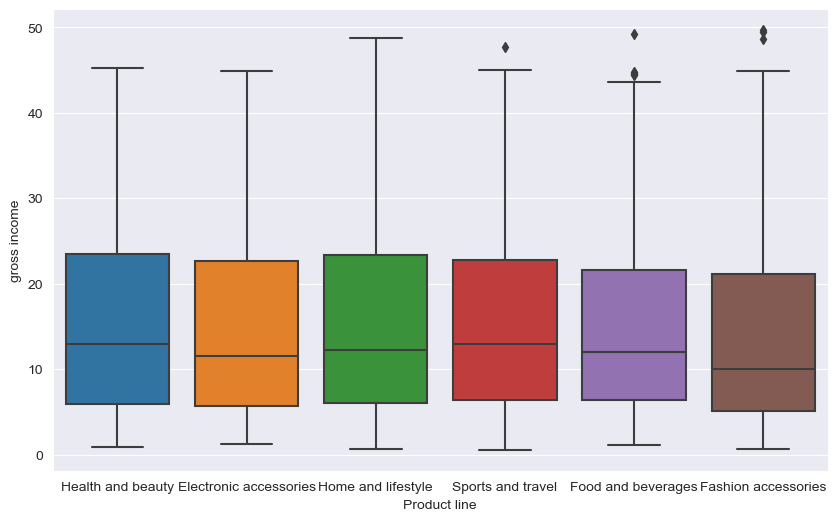

In [300]:
for cat_var in categorical_vars:
    for num_var in numerical_vars:
        plt.figure(figsize=(10,6))
        sns.boxplot(x=cat_var, y=num_var, data=ds)
        plt.show()

In [301]:
print(ds.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


## Which city is more profitable?

In [302]:
categorical_vars = ['City']
numerical_vars = ['gross income']

In [303]:
mean_city = ds.groupby(categorical_vars)[numerical_vars].mean().reset_index()

In [304]:
print(mean_city)

        City  gross income
0   Mandalay     15.232024
1  Naypyitaw     16.052367
2     Yangon     14.874001


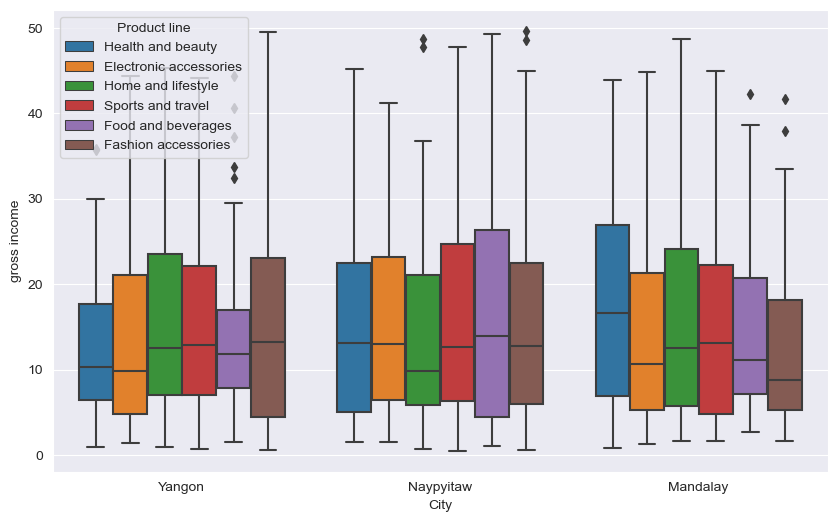

In [305]:
for cat_var in categorical_vars:
    for num_var in numerical_vars:
        plt.figure(figsize=(10,6))
        sns.boxplot(x=cat_var, y=num_var,hue='Product line', data=ds)
        plt.show()
        
        

In [306]:
ds['Date']=pd.to_datetime(ds['Date'])

In [307]:
ds.set_index('Date',inplace=True)
monthly_data = ds.resample('M').count()

In [308]:
print(monthly_data)

            Invoice ID  Branch  City  Customer type  Gender  Product line  \
Date                                                                        
2019-01-31         352     352   352            352     352           352   
2019-02-28         303     303   303            303     303           303   
2019-03-31         345     345   345            345     345           345   

            Unit price  Quantity  Tax 5%  Total  Time  Payment  cogs  \
Date                                                                   
2019-01-31         352       352     352    352   352      352   352   
2019-02-28         303       303     303    303   303      303   303   
2019-03-31         345       345     345    345   345      345   345   

            gross margin percentage  gross income  Rating  
Date                                                       
2019-01-31                      352           352     352  
2019-02-28                      303           303     303  
2019-03-31   

ValueError: x and y must have same first dimension, but have shapes (3,) and (1000,)

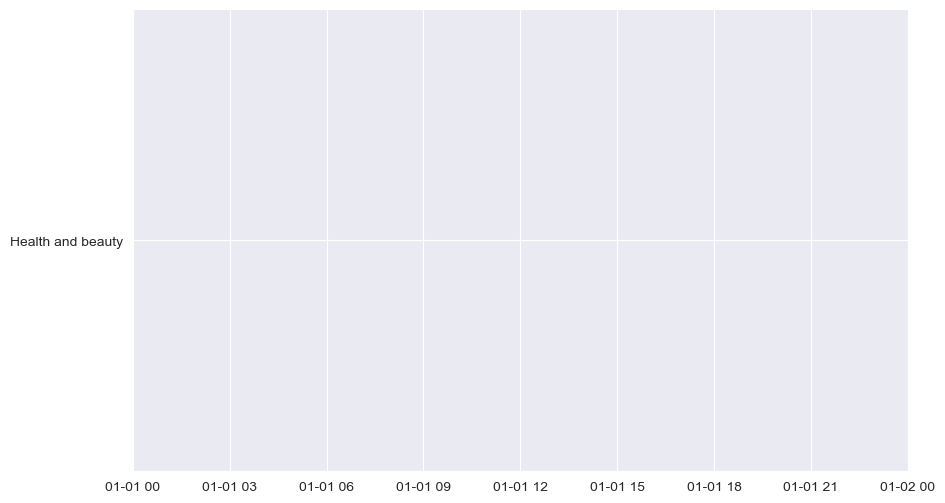

In [309]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, ds['Product line'], marker='o', color='blue', linestyle='-')
plt.title('Monthly Profit')
plt.xlabel(monthly_data)
plt.ylabel('Product line')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()